In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Train

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [4]:
train.shape

(17176, 14)

In [5]:
train.isnull().sum().sum()

1147

In [6]:
train = train.dropna()

In [7]:
train.isnull().sum().sum()

0

In [8]:
train.shape

(16968, 14)

In [9]:
train.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label'],
      dtype='object')

In [10]:
train['label']

0        correct
1        correct
2        correct
3        correct
5        correct
          ...   
17171    correct
17172    correct
17173    correct
17174    correct
17175    correct
Name: label, Length: 16968, dtype: object

In [11]:
train['fare']

0         270.32
1         197.85
2         301.64
3          82.30
5        1065.02
          ...   
17171     198.26
17172     581.23
17173      76.20
17174     133.31
17175      98.57
Name: fare, Length: 16968, dtype: float64

In [13]:
le = preprocessing.LabelEncoder()
le.fit(['incorrect', 'correct'])
train['label'] = le.transform(train['label'])
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,0
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,0
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,0
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,0


In [15]:
train['label'] = 1 - train['label']

In [16]:
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,1
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,1
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,1


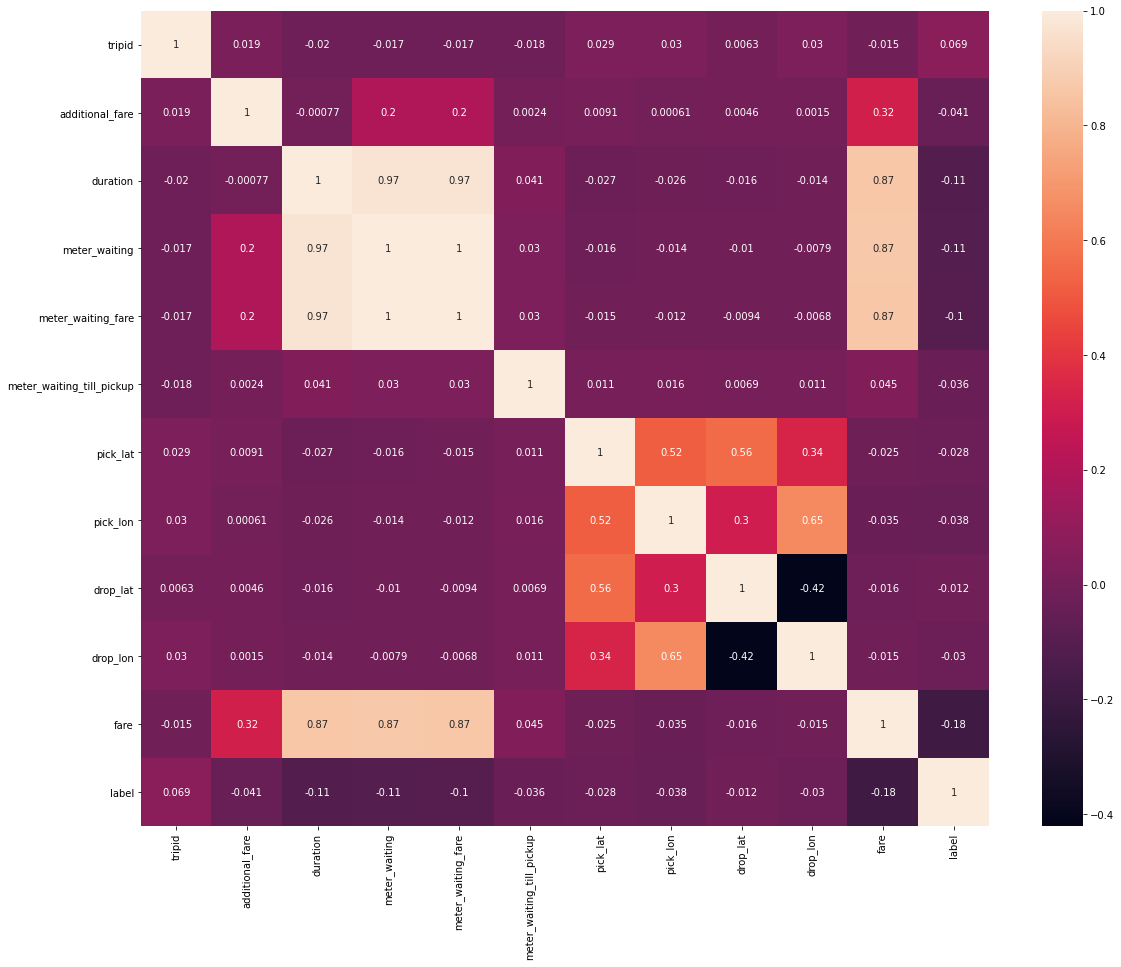

In [17]:
corrMatrix = train.corr()
plt.figure(figsize=(19,15))
sn.heatmap(corrMatrix, annot=True)


In [18]:
x = train[[ 'tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare']]
y = train[['label']]

/home/pivithurua/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.06949076 0.03047859 0.27047899 0.09258224 0.05336016 0.06598035
 0.06376755 0.06118173 0.06203772 0.06475252 0.16588938]


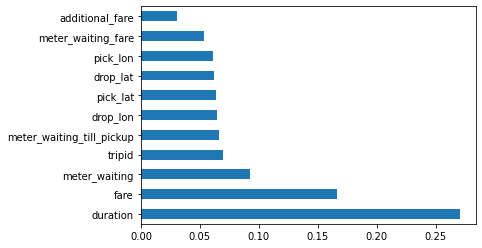

In [19]:

import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [20]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)
feature_importances

,importance
duration,0.270479
fare,0.165889
meter_waiting,0.092582
tripid,0.069491
meter_waiting_till_pickup,0.065980
drop_lon,0.064753
pick_lat,0.063768
drop_lat,0.062038
pick_lon,0.061182
meter_waiting_fare,0.053360


In [21]:
features = ['additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat','fare']

In [22]:
x = train[features]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
clf =RandomForestClassifier()

In [25]:
clf.fit(x_train,y_train)

/home/pivithurua/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [26]:
y_pred=clf.predict(x_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9398939304655274


#### Test

In [28]:
test =  pd.read_csv('test.csv')

In [29]:
test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [30]:
test.shape

(8576, 13)

In [31]:
test.isnull().sum().sum()

0

In [32]:
tripid = test['tripid']

In [33]:
test = test[features]

In [34]:
test.shape

(8576, 7)

In [35]:
result = clf.predict(test)

In [36]:
result=pd.DataFrame(result, columns=['prediction'])

In [37]:
result.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [38]:
test['prediction'] = result['prediction']

In [39]:
test.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,fare,prediction
0,10.5,924,42,2.4486,148,6.83454,289.27,1
1,10.5,4249,20,0.0000,91,6.91168,1912.70,1
2,10.5,1552,255,2.6588,23,6.92145,394.00,1
3,10.5,462,16,0.0000,198,6.77433,154.32,1
4,10.5,814,392,12.3692,69,6.97968,147.47,1


In [40]:
test['tripid'] =  tripid 

In [41]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,fare,prediction,tripid
0,10.5,924,42,2.44860,148,6.83454,289.27,1,213284604
1,10.5,4249,20,0.00000,91,6.91168,1912.70,1,213286352
2,10.5,1552,255,2.65880,23,6.92145,394.00,1,213293973
3,10.5,462,16,0.00000,198,6.77433,154.32,1,213294622
4,10.5,814,392,12.36920,69,6.97968,147.47,1,213298687
...,...,...,...,...,...,...,...,...,...
8571,10.5,1723,429,24.83332,3,6.85103,388.48,1,222856243
8572,10.5,1378,80,0.00000,125,6.91293,379.85,1,222857785
8573,10.5,418,56,3.28440,93,6.85718,112.79,1,222858416
8574,10.5,1604,548,31.67440,17,6.91289,248.46,1,222858691


In [42]:
test[[ "tripid","prediction"]].to_csv('submission.csv', index = False)